In [4]:
!pip install torchmetrics

In [5]:
!pip install Pillow

In [6]:
!pip install scikit-learn

In [7]:
!pip install torchvision

In [9]:
!pip install matplotlib

  Using cached matplotlib-3.5.3-cp310-cp310-macosx_11_0_arm64.whl (7.2 MB)
  Using cached fonttools-4.37.1-py3-none-any.whl (957 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [4]:
!pip install numpy

  Using cached numpy-1.23.1-cp38-cp38-macosx_11_0_arm64.whl (13.3 MB)


In [1]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 MB 2.7 MB/s eta 0:00:0000:0100:01


In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
from collections import Counter
from pathlib import Path
from PIL import Image
from torchvision.models import resnet18, ResNet18_Weights
import torchmetrics

In [15]:
path = []
labels = []

path_to_dataset = "/Users/samiatbola-matanmi/Documents/ML_Prac/Data/animals"
os.listdir(path_to_dataset)
for file in os.listdir(path_to_dataset):
    path_dir = Path(os.path.join(path_to_dataset, file))
    for image in os.listdir(path_dir):
        image_path = Path(os.path.join(path_dir, image))
        path.append(image_path)
        labels.append(image_path.parent.stem)
        # os.remove(os.path.join(path_to_dataset, '.DS_Store'))

    print(path_dir)

/Users/samiatbola-matanmi/Documents/ML_Prac/Data/animals/dogs
/Users/samiatbola-matanmi/Documents/ML_Prac/Data/animals/cats
/Users/samiatbola-matanmi/Documents/ML_Prac/Data/animals/panda


In [16]:
Counter(labels)

Counter({'dogs': 1000, 'cats': 1000, 'panda': 1000})

# Split dataset

In [17]:
x_train, x_test, y_train, y_test = train_test_split(path, labels, test_size=0.2, random_state=123)

In [18]:
print(len(x_test))

600


# Data Augumentation

In [19]:
train_augument = transforms.Compose([
    transforms.ColorJitter(0.1, 0.1, 0.1),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(1),
    transforms.RandomVerticalFlip(0.1),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

test_augument = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

In [20]:
class Animal_Dataset:
    def __init__(self, path, labels, augumentations):
        self.path = path
        self.labels = labels
        self.augumentations = augumentations
        self.classes = {
            'dogs': 0,
            'cats': 1,
            'panda': 2
        }
        
    def __len__(self):
        return len(self.path)
    
    def __getitem__(self, idx):
        
        sample_data = Image.open(self.path[idx]).convert(mode='RGB')
        sample_data = self.augumentations(sample_data)
        
        label = self.labels[idx]
        if label == 'dogs':
            label = 0
        elif label == 'cats':
            label = 1
        elif label == 'panda':
            label = 2
            
        return sample_data, label
        

In [21]:
train_dataset = Animal_Dataset(x_train, y_train, train_augument)
test_dataset = Animal_Dataset(x_test, y_test, test_augument)

# Visualize Data

In [22]:
basic_augmentations = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

In [23]:
plot_data = Animal_Dataset(x_train[:16], y_train[:16], basic_augmentations)

to_plot = []
classes = {
    0: 'dogs',
    1: 'cats',
    2: 'panda'
}

for x, y in plot_data:
    to_plot.append((x,y))
    
print(to_plot)

[(tensor([[[0.5176, 0.5020, 0.4980,  ..., 0.6510, 0.6471, 0.6392],
         [0.5569, 0.5412, 0.5294,  ..., 0.6941, 0.6902, 0.6784],
         [0.5922, 0.5725, 0.5608,  ..., 0.7137, 0.7059, 0.7020],
         ...,
         [0.6275, 0.6157, 0.6078,  ..., 0.5686, 0.5725, 0.5882],
         [0.6353, 0.6235, 0.6196,  ..., 0.5686, 0.5725, 0.5882],
         [0.6471, 0.6392, 0.6353,  ..., 0.5804, 0.5843, 0.5961]],

        [[0.3882, 0.3922, 0.3961,  ..., 0.5333, 0.5294, 0.5216],
         [0.4157, 0.4196, 0.4196,  ..., 0.5804, 0.5765, 0.5647],
         [0.4392, 0.4471, 0.4471,  ..., 0.6078, 0.6000, 0.5961],
         ...,
         [0.5765, 0.5725, 0.5765,  ..., 0.5294, 0.5412, 0.5569],
         [0.5843, 0.5843, 0.5882,  ..., 0.5294, 0.5412, 0.5569],
         [0.5961, 0.6000, 0.6039,  ..., 0.5412, 0.5529, 0.5647]],

        [[0.2275, 0.2078, 0.2157,  ..., 0.8275, 0.8157, 0.8078],
         [0.2627, 0.2549, 0.2549,  ..., 0.8510, 0.8353, 0.8275],
         [0.3020, 0.3020, 0.3020,  ..., 0.8431, 0.8196, 

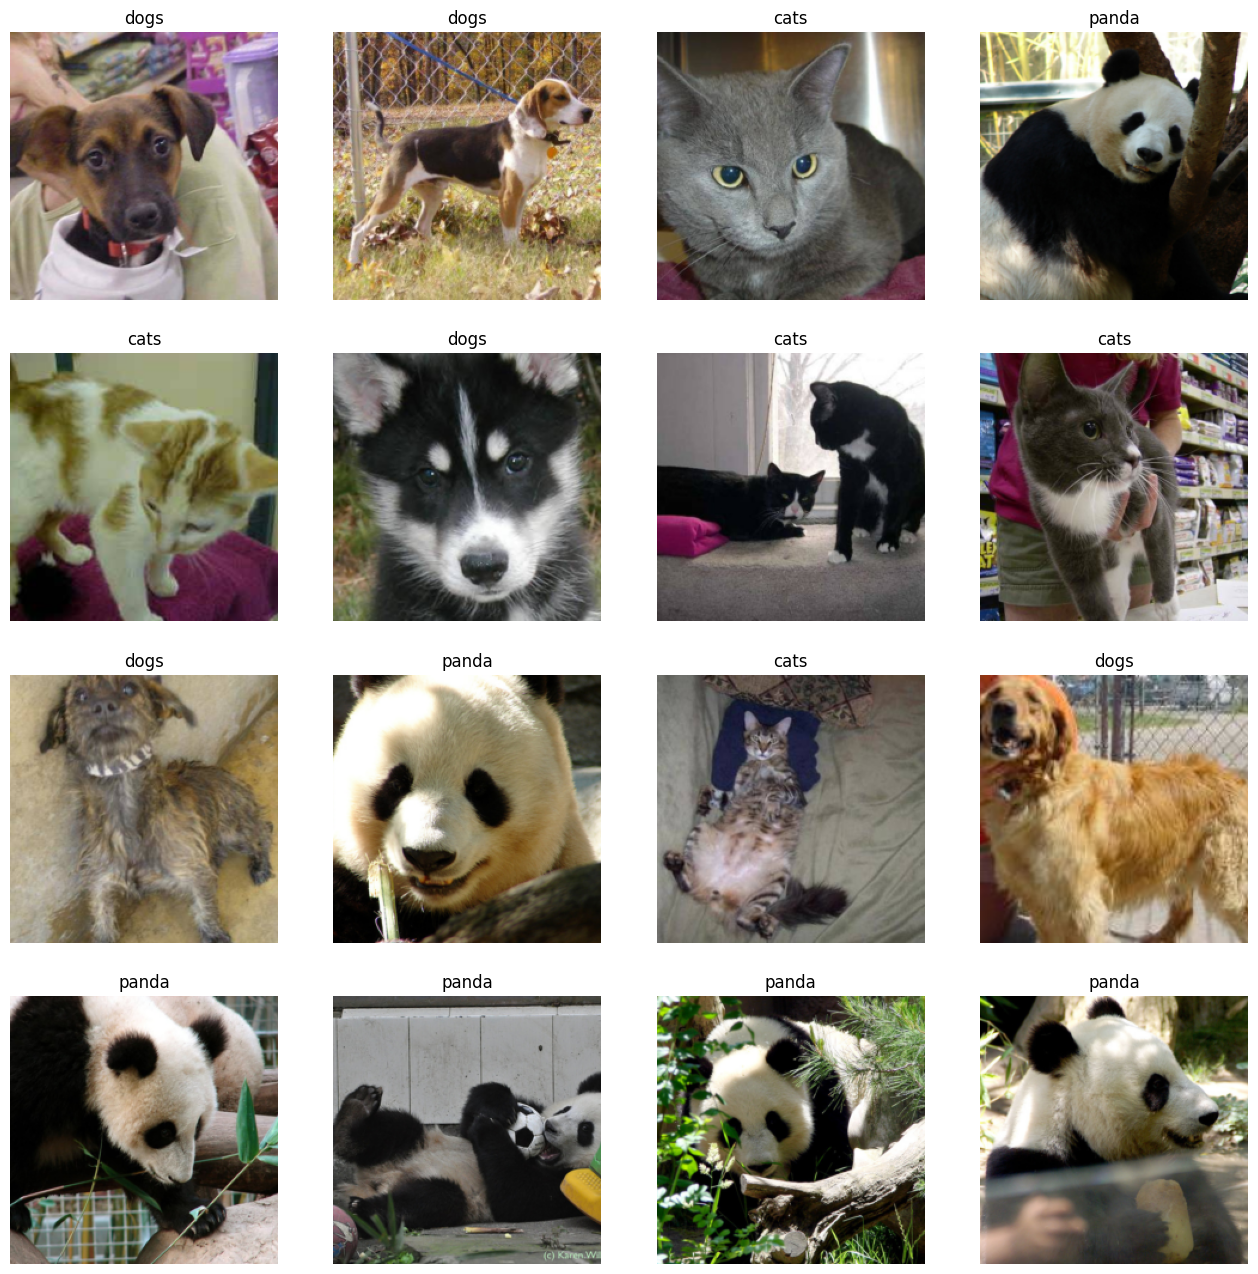

In [24]:
figure = plt.figure(figsize=(16,16))
for i in range(1,17):
    img = to_plot[i-1][0].permute(1,2,0)
    label = classes[(to_plot[i-1][1])]
    figure.add_subplot(4,4,i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img)

# DataLoaders

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64)

In [26]:
len(train_dataloader), len(test_dataloader)

(38, 10)

# Model

In [27]:
class CNNModel(nn.Module):
    
    def __init__(self, in_features=3, num_classes=3):
        self.in_features = in_features
        self.num_classes = num_classes
        
        super(CNNModel, self).__init__()
        
        self.conv_block = nn.Sequential(
            nn.Conv2d(self.in_features,32,3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(32,64,3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64,128,3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(128,256,3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(256,256,3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.linear_block = nn.Sequential(
            nn.Linear(256*5*5, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64,self.num_classes)
        )

    def forward(self,x):
        x = self.conv_block(x)
        x = torch.flatten(x,1)
        x = self.linear_block(x)
        return x

In [28]:
print(CNNModel())

CNNModel(
  (conv_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_block): Sequential(
    (0): Linear(in_features=6400, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (

In [30]:
model = torchvision.models.resnet18(weights=ResNet18_Weights)
print(model)

/opt/homebrew/Caskroom/miniforge/base/envs/CatandDog/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/samiatbola-matanmi/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
52.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(512, 3, bias=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Training

In [34]:
class Trainer:
    
    def __init__(self, model, loaders, config):
        self.model = model
        self.train_loader, self.val_loader = loaders
        self.config = config
        
        self.loss_fn = nn.CrossEntropyLoss()
        self.optim1 = torch.optim.SGD(self.model.parameters(), 
                                     lr=self.config['lr'], 
                                     momentum=self.config['sgd_momentum']
                                    )
        self.optim2 = torch.optim.Adam(self.model.parameters(),
                                       lr = self.config['lr']
                                      )
        
        
        self.optim = self.optim2
        
        if self.config['scheduler']:
            self.scheduler = torch.optim.lr_scheduler.StepLR(optimizer=self.optim,step_size=2, gamma=0.2)
        
        self.metrics = torchmetrics.MetricCollection([
            torchmetrics.Accuracy(average='macro', num_classes=3),
            torchmetrics.Precision(average='macro', num_classes=3),
            torchmetrics.Recall(average='macro', num_classes=3),
            torchmetrics.F1Score(average='macro', num_classes=3)
        ]).to(self.config['device'])
        self.train_metrics = self.metrics.clone(prefix='train_')
        self.val_metrics = self.metrics.clone(prefix='val_')
        
        self.train_logs = []
        self.val_logs = []
        
    def logger(self, epoch, metrics, loss, mode):
        
        metrics = {metric:metrics[metric].cpu().item() for metric in metrics}

        log = {
            f'epoch_{epoch}': {
                'loss': loss,
                'metrics': metrics
            }
        }
        if mode == 'train':
            self.train_logs.append(log)
        else:
            self.val_logs.append(log)
            
    def print_per_epoch(self, epoch):
        print(f"\n\n{'-'*30}EPOCH {epoch+1}/{self.config['epochs']}{'-'*30}")
        train_loss = self.train_logs[epoch][f'epoch_{epoch}']['loss']
        train_acc = self.train_logs[epoch][f'epoch_{epoch}']['metrics']['train_Accuracy']
        val_loss = self.val_logs[epoch][f'epoch_{epoch}']['loss']
        val_acc = self.val_logs[epoch][f'epoch_{epoch}']['metrics']['val_Accuracy']
        print(f"Train -> LOSS: {train_loss} | ACC: {train_acc}")
        print(f"Validation -> LOSS: {val_loss} | ACC: {val_acc}")
        
    def train_one_epoch(self, epoch):
        
        running_loss = 0
        
        for x,y in self.train_loader:
            
            self.optim.zero_grad()
        
            x = x.to(self.config['device'])
            y = y.to(self.config['device'])
            
            preds = self.model(x)
            
            loss = self.loss_fn(preds, y)
            running_loss += loss.item()
            loss.backward()
            self.optim.step()
            
            self.train_metrics(torch.argmax(preds, dim=1), y)
            
            del x,y,preds,loss
            
        if self.config['scheduler']:
            self.scheduler.step()
            
        metrics = self.train_metrics.compute()
        train_loss = running_loss / len(self.train_loader)
        
        self.logger(epoch,metrics,train_loss,'train')

        del metrics
        
    @torch.no_grad()
    def valid_one_epoch(self, epoch):
        
        running_loss = 0
        
        for x,y in self.val_loader:
            
            x = x.to(self.config['device'])
            y = y.to(self.config['device'])
            
            preds = self.model(x)
            loss = self.loss_fn(preds, y)
            running_loss += loss.item()
            
            self.val_metrics(torch.argmax(preds, dim=1), y)
            
            del x,y,preds,loss
            
        metrics = self.val_metrics.compute()
        val_loss = running_loss / len(self.val_loader)
        self.logger(epoch,metrics,val_loss,'val')
        
        del metrics
        
    # def clear(self):
    #     gc.collect()
    #     torch.cuda.empty_cache()
            
        
    def fit(self):
        
        for epoch in range(self.config['epochs']):
            
            self.model.train()
            self.train_one_epoch(epoch)
            
#             self.clear()
            
            self.model.eval()
            self.valid_one_epoch(epoch)
            
#             self.clear()
            
            # reset metrics
            self.train_metrics.reset()
            self.val_metrics.reset()
            
            # print metrics
            self.print_per_epoch(epoch)

# Train with Scheduler

In [41]:
config = {
    'lr': 1e-3,
    'epochs': 50,
    'sgd_momentum': 0.8,
    'scheduler': True,
    'sch_step_size': 2,
    'sch_gamma': 0.2,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}
print(config['device'])
model = model.to(device=config['device'])
trainer = Trainer(model, (train_dataloader, test_dataloader), config)

cpu


In [42]:
trainer.fit()



------------------------------EPOCH 1/50------------------------------
Train -> LOSS: 0.13825659473475657 | ACC: 0.9592755436897278
Validation -> LOSS: 0.09248068667948246 | ACC: 0.9639654755592346


------------------------------EPOCH 2/50------------------------------
Train -> LOSS: 0.12490303353651573 | ACC: 0.9593142867088318
Validation -> LOSS: 0.07852074168622494 | ACC: 0.9662479162216187


------------------------------EPOCH 3/50------------------------------
Train -> LOSS: 0.12080311745797333 | ACC: 0.9591963291168213
Validation -> LOSS: 0.07926871106028557 | ACC: 0.9623551368713379


------------------------------EPOCH 4/50------------------------------
Train -> LOSS: 0.11096010298321121 | ACC: 0.9646449089050293
Validation -> LOSS: 0.07586323022842408 | ACC: 0.9624848961830139


------------------------------EPOCH 5/50------------------------------
Train -> LOSS: 0.10251789873367861 | ACC: 0.9671112298965454
Validation -> LOSS: 0.07451264783740044 | ACC: 0.96407151222229




In [45]:
model_scripted = torch.jit.script(model)
model_scripted.save('model_scripted_resnet_1.pt')

 # HyperParameter Tuning

In [130]:
!pip install ray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 3.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 1.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.0/467.0 kB 2.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for grpcio: filename=grpcio-1.43.0-cp38-cp38-macosx_11_0_arm64.whl size=3029256 sha256=ab63